# **Installations and Imports**

In [93]:
!pip install pingouin

In [94]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Loading and Preprocessing of Data**

In [95]:
# Load the dataset
df = pd.read_csv("Lung_Cancer.csv")  # Clean and preprocess the dataset#Load the dataset

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [96]:
df.shape
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [97]:
#Check for missing values
print(df.isnull().sum())

#Remove missing values
df = df.dropna()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [99]:
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [100]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [101]:
# Remove whitespaces from the DataFrame
df.columns = df.columns.str.strip()

#Convert '2' to '1' and '1' to '0'
new_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                      'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                      'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                      'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for col in new_columns:
    if col in df.columns:
        df[col] = df[col].map({2: 1, 1: 0})

# Convert 'YES' to '1' and 'NO' to '0' for the 'LUNG_CANCER' column
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [102]:
# Binning 'AGE' and One-Hot Encoding for Binned Age
bins = [0, 30, 60, 90]
labels = ['Young', 'Middle', 'Senior']
df['AGE_BINNED'] = pd.cut(df['AGE'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['AGE_BINNED'])

# One-Hot Encoding 'GENDER'
ohe = OneHotEncoder()
df_gender_encoded = ohe.fit_transform(df[['GENDER']]).toarray()
gender_columns = ohe.get_feature_names_out(['GENDER'])
df[gender_columns] = df_gender_encoded

# Drop the original 'GENDER' column
df = df.drop('GENDER', axis=1)

# Interaction between Gender and Smoking
df['GENDER_M_SMOKING'] = df['GENDER_M'] * df['SMOKING']

# Cumulative Risk Score
risk_factors = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE']
df['CUMULATIVE_RISK'] = df[risk_factors].sum(axis=1)

# Polynomial Features for Age
df['AGE_SQUARED'] = df['AGE'] ** 2
df['AGE_CUBED'] = df['AGE'] ** 3

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,LUNG_CANCER,AGE_BINNED_Young,AGE_BINNED_Middle,AGE_BINNED_Senior,GENDER_F,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED,AGE_CUBED
0,69,0,1,1,0,0,1,0,1,1,...,1,False,False,True,0.0,1.0,0.0,2,4761,328509
1,74,1,0,0,0,1,1,1,0,0,...,1,False,False,True,0.0,1.0,1.0,2,5476,405224
2,59,0,0,0,1,0,1,0,1,0,...,0,False,True,False,1.0,0.0,0.0,1,3481,205379
3,63,1,1,1,0,0,0,0,0,1,...,0,False,False,True,0.0,1.0,1.0,3,3969,250047
4,63,0,1,0,0,0,0,0,1,0,...,0,False,False,True,1.0,0.0,0.0,1,3969,250047


# **Univariate Analysis**

In [103]:
# Create a DataFrame to hold the statistics
statistics = pd.DataFrame()

# Hold the features in a list
# Find the number of features
features = df.columns.tolist()
num_features = len(features)

# Generate DataFrames for each statistic
means_df = np.mean(df, axis=0)
medians_df = df.median()
modes_df = df.mode().iloc[0]
stds_df = df.std()
variances_df = df.var()
mins_df = df.min()
maxs_df = df.max()
skewness_df = df.skew()
kurtosis_df = df.kurt()

# Convert the statistical values in the DataFrames to lists
means = [means_df.iloc[i] for i in range(num_features)]
medians = [medians_df.iloc[i] for i in range(num_features)]
modes = [modes_df.iloc[i] for i in range(num_features)]
stds = [stds_df.iloc[i] for i in range(num_features)]
variances = [variances_df.iloc[i] for i in range(num_features)]
mins = [mins_df.iloc[i] for i in range(num_features)]
maxs = [maxs_df.iloc[i] for i in range(num_features)]
skew_vals = [skewness_df.iloc[i] for i in range(num_features)]
kurtosis_vals = [kurtosis_df.iloc[i] for i in range(num_features)]

# Add the statistical values to the statistics DataFrame
statistics['Features'] = features
statistics['Means'] = means
statistics['Medians'] = medians
statistics['Modes'] = modes
statistics['Standard Deviations'] = stds
statistics['Variances'] = variances
statistics['Minimum Values'] = mins
statistics['Maximum Values'] = maxs
statistics['Skew Values'] = skew_vals
statistics['Kurtosis Values'] = kurtosis_vals

# Print out the statistics DataFrame
statistics.head(16)

,Features,Means,Medians,Modes,Standard Deviations,Variances,Minimum Values,Maximum Values,Skew Values,Kurtosis Values
0,AGE,62.673139,62.0,64,8.210301,67.409049,21,87,-0.395086,1.746558
1,SMOKING,0.563107,1.0,1,0.496806,0.246816,0,1,-0.255705,-1.947261
2,YELLOW_FINGERS,0.569579,1.0,1,0.495938,0.245955,0,1,-0.282425,-1.932789
3,ANXIETY,0.498382,0.0,0,0.500808,0.250809,0,1,0.006504,-2.013029
4,PEER_PRESSURE,0.501618,1.0,1,0.500808,0.250809,0,1,-0.006504,-2.013029
5,CHRONIC DISEASE,0.504854,1.0,1,0.500787,0.250788,0,1,-0.019513,-2.012689
6,FATIGUE,0.673139,1.0,1,0.469827,0.220737,0,1,-0.741836,-1.459167
7,ALLERGY,0.556634,1.0,1,0.497588,0.247594,0,1,-0.229118,-1.960235
8,WHEEZING,0.556634,1.0,1,0.497588,0.247594,0,1,-0.229118,-1.960235
9,ALCOHOL CONSUMING,0.556634,1.0,1,0.497588,0.247594,0,1,-0.229118,-1.960235


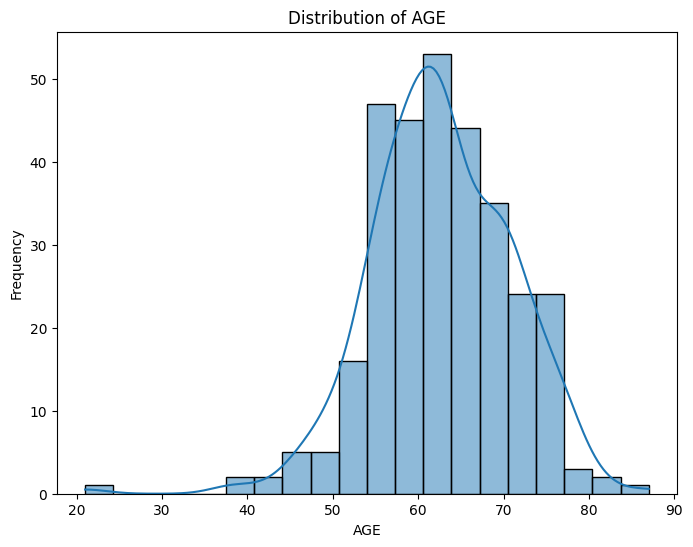

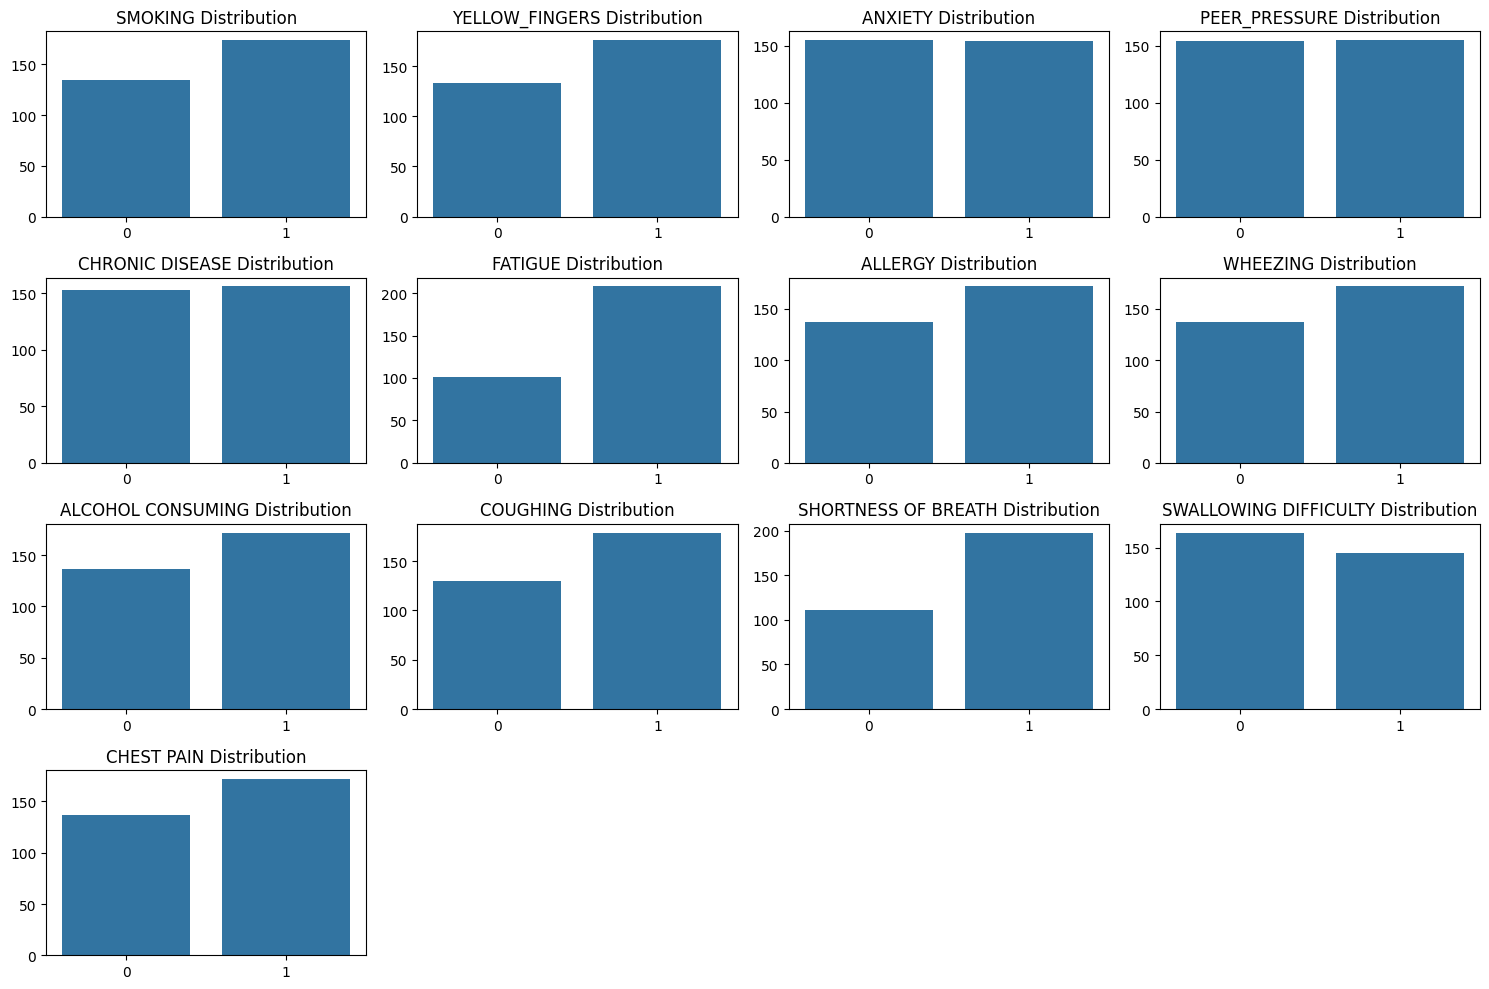

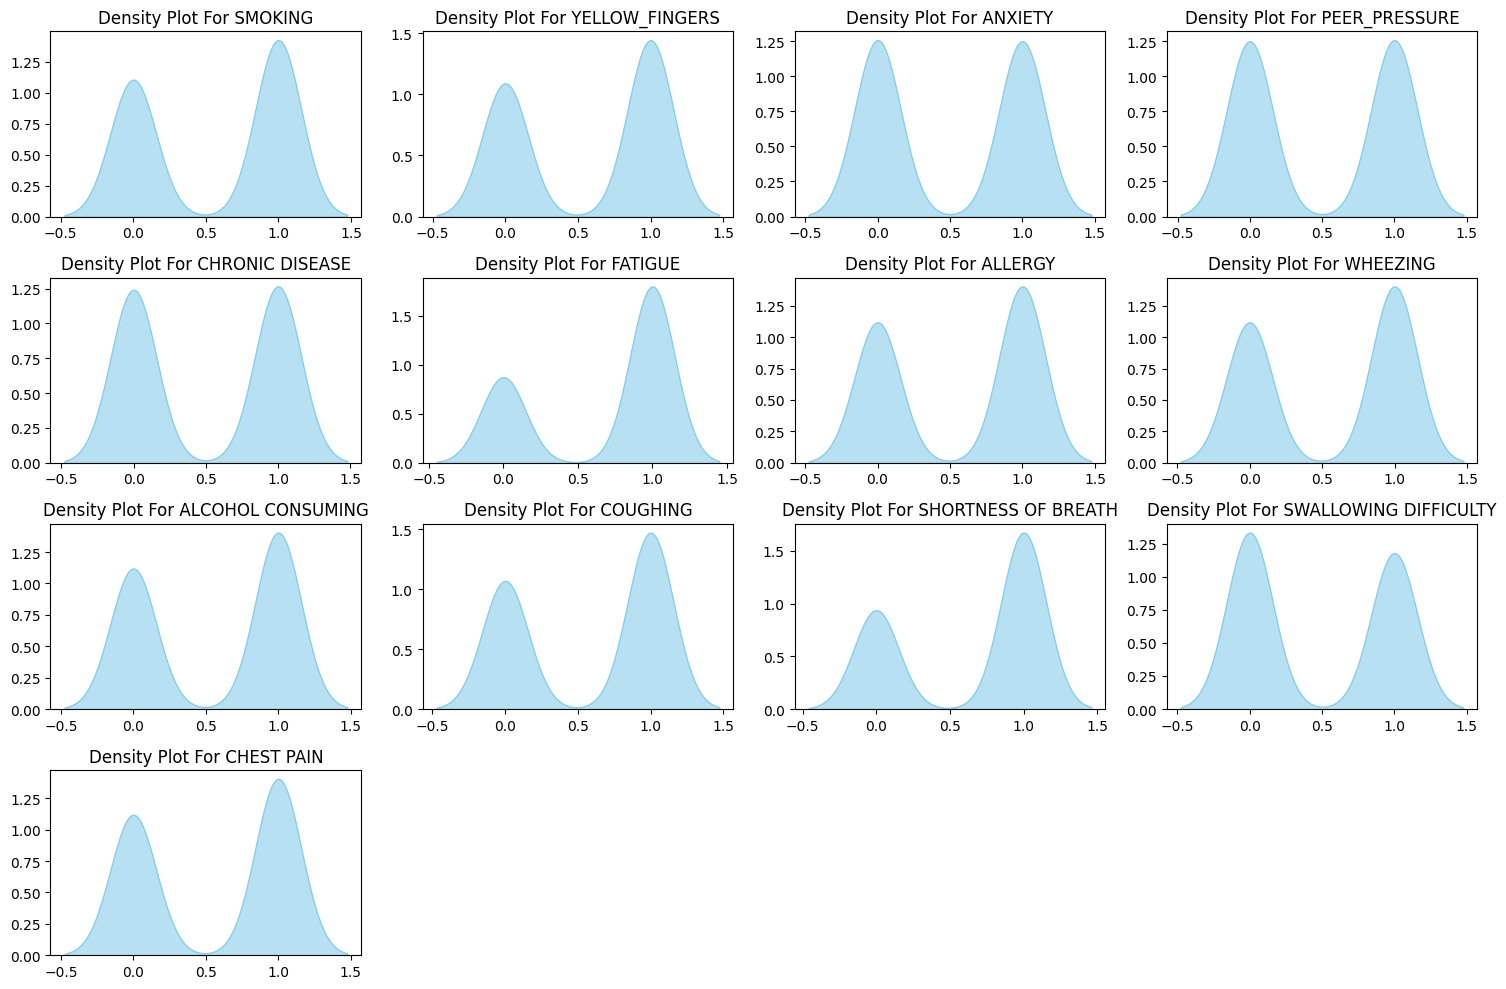

In [104]:
# Remove any leading/trailing whitespace in column names
df.columns = df.columns.str.strip()

# Visualize the distribution of numerical features using bar chart w/curve
numerical_columns = ['AGE']  # Add more columns if needed
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the binary features using bar charts
binary_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                  'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                  'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                  'SWALLOWING DIFFICULTY', 'CHEST PAIN']
plt.figure(figsize=(15, 10))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=df[column])
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Visualize the binary features using density plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df[column], fill=True, color='skyblue', alpha=0.6)
    plt.title(f'Density Plot For {column}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [105]:
# Obtain the class counts for each category to evaluate if there is imbalance
for column in df.columns:
  print(df[column].value_counts())
  print()

AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

SMOKING
1    174
0    135
Name: count, dtype: int64

YELLOW_FINGERS
1    176
0    133
Name: count, dtype: int64

ANXIETY
0    155
1    154
Name: count, dtype: int64

PEER_PRESSURE
1    155
0    154
Name: count, dtype: int64

CHRONIC DISEASE
1    156
0    153
Name: count, dtype: int64

FATIGUE
1    208
0    101
Name: count, dtype: int64

ALLERGY
1    172
0    137
Name: count, dtype: int64

WHEEZING
1    172
0    137
Name: count, dtype: int64

ALCOHOL CONSUMING
1    172
0    137
Name: count, dtype: int64

COUGHING
1    179
0    130
Name: count, dtype: int64

SHORTNESS OF BREATH
1    198
0    111
Name: count, dtyp

# **Correlation Analysis**

In [106]:
# Splitting the Dataset
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

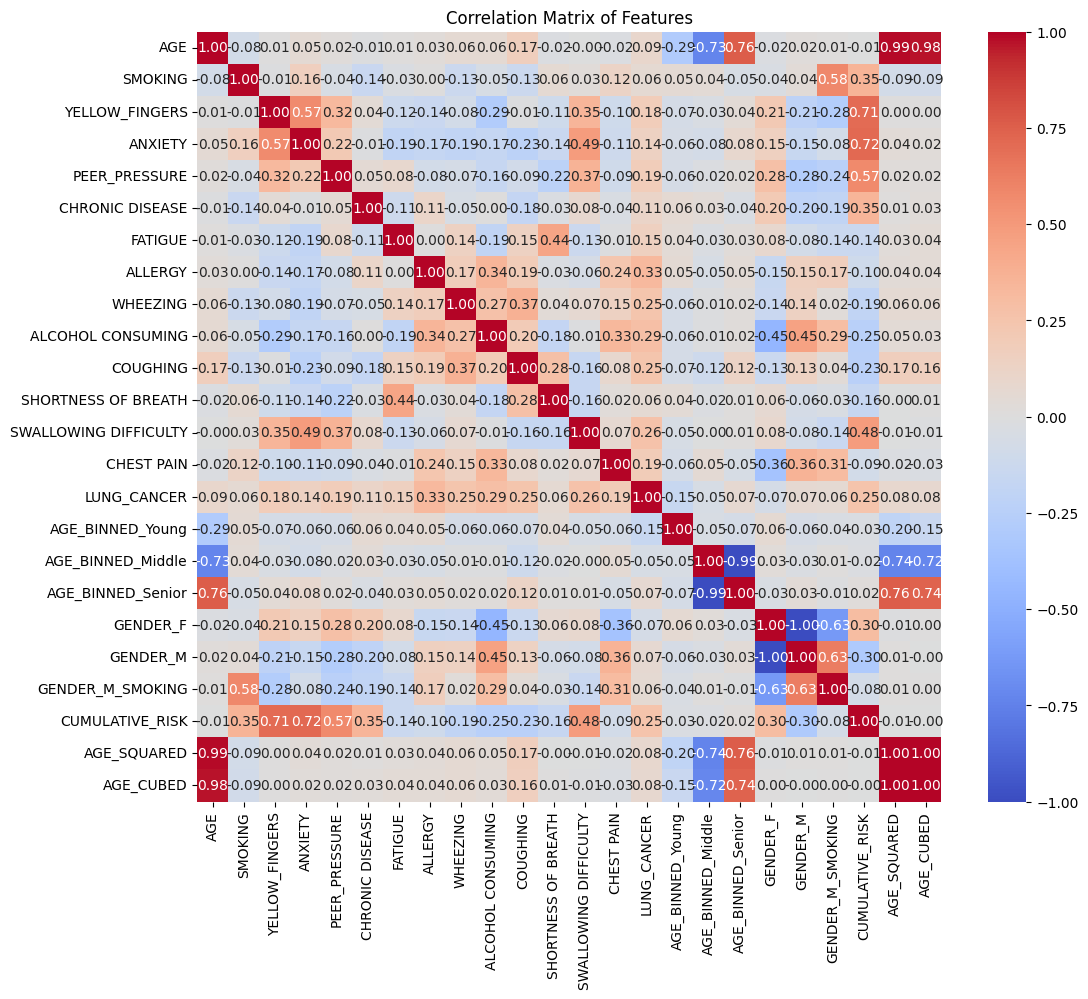

In [107]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

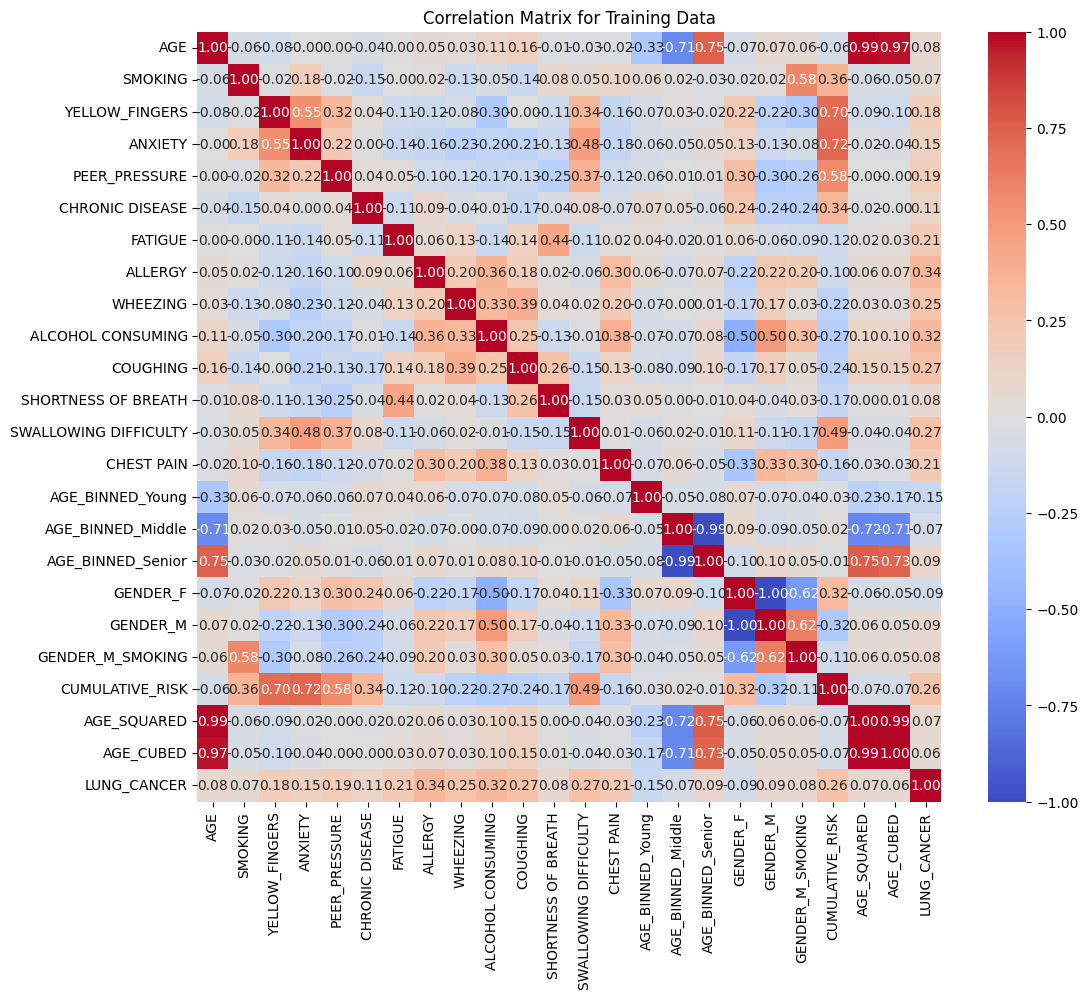


Correlation of each feature with LUNG_CANCER:
 LUNG_CANCER              1.000000
ALLERGY                  0.335991
ALCOHOL CONSUMING        0.320463
SWALLOWING DIFFICULTY    0.272262
COUGHING                 0.266227
CUMULATIVE_RISK          0.258831
WHEEZING                 0.252148
CHEST PAIN               0.206604
FATIGUE                  0.205063
PEER_PRESSURE            0.187774
YELLOW_FINGERS           0.183833
ANXIETY                  0.151626
CHRONIC DISEASE          0.109569
AGE_BINNED_Senior        0.089312
GENDER_M                 0.085816
AGE                      0.084629
GENDER_M_SMOKING         0.083194
SHORTNESS OF BREATH      0.081827
AGE_SQUARED              0.072615
SMOKING                  0.068035
AGE_CUBED                0.064028
AGE_BINNED_Middle       -0.069802
GENDER_F                -0.085816
AGE_BINNED_Young        -0.151894
Name: LUNG_CANCER, dtype: float64

Highly correlated feature pairs (absolute correlation > 0.7):
 AGE_SQUARED        AGE_CUBED          

In [108]:
# Merge 'LUNG_CANCER' back into X_train temporarily for correlation analysis with the target
X_train_with_target = X_train.copy()
X_train_with_target['LUNG_CANCER'] = y_train

# Step 1: Calculate the correlation matrix
correlation_matrix = X_train_with_target.corr()

# Step 2: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Training Data")
plt.show()

# Step 3: Analyze correlations
# Extract correlations of each feature with 'LUNG_CANCER'
lung_cancer_corr = correlation_matrix['LUNG_CANCER'].sort_values(ascending=False)
print("\nCorrelation of each feature with LUNG_CANCER:\n", lung_cancer_corr)

# Optional: Identify highly correlated features within X_train
# Select pairs with absolute correlation above a certain threshold (e.g., 0.7)
threshold = 0.7
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Exclude self-correlation
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

print("\nHighly correlated feature pairs (absolute correlation > 0.7):\n", high_corr_pairs)

In [109]:
# Calculate partial correlations with 'LUNG_CANCER' while controlling for all other features
partial_corr = pg.partial_corr(data=X_train_with_target, x='LUNG_CANCER', y=X_train.columns.tolist(), covar=X_train.columns.difference(['LUNG_CANCER']).tolist())
print("\nPartial Correlations with LUNG_CANCER:\n", partial_corr)


Partial Correlations with LUNG_CANCER:
            n         r          CI95%     p-val
pearson  247 -0.046615  [-0.18, 0.09]  0.510046


In [110]:
# # Calculate VIF for each feature in X_train
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_train.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)

In [111]:
# Calculate point-biserial correlations between binary features and LUNG_CANCER
binary_features = X_train.columns  # Replace with binary features only if needed
biserial_corrs = {feature: pointbiserialr(X_train_with_target[feature], y_train)[0] for feature in binary_features}

print("\nPoint-Biserial Correlations with LUNG_CANCER:\n", biserial_corrs)


Point-Biserial Correlations with LUNG_CANCER:
 {'AGE': 0.08462929719977395, 'SMOKING': 0.06803456993425687, 'YELLOW_FINGERS': 0.18383280912708053, 'ANXIETY': 0.1516262127293482, 'PEER_PRESSURE': 0.18777400104623512, 'CHRONIC DISEASE': 0.10956889466272621, 'FATIGUE': 0.2050625081893761, 'ALLERGY': 0.33599086371292314, 'WHEEZING': 0.25214780991101565, 'ALCOHOL CONSUMING': 0.32046281069495064, 'COUGHING': 0.26622685186403666, 'SHORTNESS OF BREATH': 0.0818273510038963, 'SWALLOWING DIFFICULTY': 0.27226205058149583, 'CHEST PAIN': 0.2066044760550589, 'AGE_BINNED_Young': -0.1518942143076723, 'AGE_BINNED_Middle': -0.06980228677991988, 'AGE_BINNED_Senior': 0.08931209321712491, 'GENDER_F': -0.0858162469116044, 'GENDER_M': 0.0858162469116044, 'GENDER_M_SMOKING': 0.08319379136213782, 'CUMULATIVE_RISK': 0.2588307145746222, 'AGE_SQUARED': 0.0726151219859657, 'AGE_CUBED': 0.06402833497590425}


In [112]:
# Train a Random Forest and get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:\n", feature_importances)


Feature Importances from Random Forest:
                   Feature  Importance
20        CUMULATIVE_RISK    0.102425
9       ALCOHOL CONSUMING    0.088753
21            AGE_SQUARED    0.083556
0                     AGE    0.072708
22              AGE_CUBED    0.072471
7                 ALLERGY    0.067016
2          YELLOW_FINGERS    0.049845
4           PEER_PRESSURE    0.048533
10               COUGHING    0.046163
6                 FATIGUE    0.045606
12  SWALLOWING DIFFICULTY    0.043163
13             CHEST PAIN    0.040375
5         CHRONIC DISEASE    0.039181
8                WHEEZING    0.037987
11    SHORTNESS OF BREATH    0.031317
3                 ANXIETY    0.022642
18               GENDER_M    0.020456
1                 SMOKING    0.019060
19       GENDER_M_SMOKING    0.018882
17               GENDER_F    0.016797
15      AGE_BINNED_Middle    0.014720
16      AGE_BINNED_Senior    0.014579
14       AGE_BINNED_Young    0.003765


# **Building Models**

## **Logistic Regression**

### **General Models**

#### **Lbfgs Solver**

In [113]:
# Create and fit Logistic Regression model on the training dataset with lbfgs solver
lr_model = LogisticRegression(solver='lbfgs', max_iter=10000, C=10, random_state=42)
lr_model.fit(X_train, y_train)

# Run the Logistic Regression model on the testing dataset
y_pred_test = lr_model.predict(X_test)

# Calculate the metrics on the testing dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics for the testing dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')

Validation Accuracy: 0.968
Validation Precision: 0.983
Validation Recall: 0.983
Validation F1: 0.983


#### **Liblinear Solver**

In [114]:
# Create and fit Logistic Regression model on the training dataset with liblinear solver
lr_model = LogisticRegression(solver='liblinear', max_iter=10000, C=10, random_state=42)
lr_model.fit(X_train, y_train)

# Run the Logistic Regression model on the testing dataset
y_pred_test = lr_model.predict(X_test)

# Calculate the metrics on the testing dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics for the testing dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')

Validation Accuracy: 0.968
Validation Precision: 0.968
Validation Recall: 1.000
Validation F1: 0.984


### **Cross-Validation**

#### **Lbfgs Solver**

In [115]:
# Logistic Regression Cross-Validation
lr_model = LogisticRegression(solver='lbfgs', max_iter=10000, C=10, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {np.mean(lr_cv_scores):.3f} ± {np.std(lr_cv_scores):.3f}")

Logistic Regression Cross-Validation Accuracy: 0.895 ± 0.026


#### **Liblinear Solver**

In [116]:
# Logistic Regression Cross-Validation
lr_model = LogisticRegression(solver='liblinear', max_iter=10000, C=10, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {np.mean(lr_cv_scores):.3f} ± {np.std(lr_cv_scores):.3f}")

Logistic Regression Cross-Validation Accuracy: 0.850 ± 0.008


### **Grid Search CV**

#### **Lbfgs Solver**

In [117]:
# Set the parameters grid that the cross-validation will run on
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Initialize the Logistic Regression model
lr_model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=42)

# Perform the Grid Search CV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)

Best parameters found:  {'C': 1}
Best cross-validated accuracy:  0.9026666666666667


#### **Liblinear Solver**

In [118]:
# Set the parameters grid that the cross-validation will run on
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# Initialize the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', max_iter=10000, random_state=42)

# Perform the Grid Search CV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)

Best parameters found:  {'C': 1, 'penalty': 'l1'}
Best cross-validated accuracy:  0.907


### **General Model With Hyperparameter Tuning**

#### **Lbfgs Solver**

In [119]:
# Create and fit Logistic Regression model on the training dataset with lbfgs solver
lr_model = LogisticRegression(solver='lbfgs', max_iter=10000, C=1, random_state=42)
lr_model.fit(X_train, y_train)

# Run the Logistic Regression model on the testing dataset
y_pred_test = lr_model.predict(X_test)

# Calculate the metrics on the testing dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics for the testing dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')

Validation Accuracy: 0.968
Validation Precision: 0.983
Validation Recall: 0.983
Validation F1: 0.983


#### **Liblinear Solver**

In [120]:
# Create and fit Logistic Regression model on the training dataset with liblinear solver
lr_model = LogisticRegression(solver='liblinear', max_iter=10000, C=1, penalty='l1', random_state=42)
lr_model.fit(X_train, y_train)

# Run the Logistic Regression model on the testing dataset
y_pred_test = lr_model.predict(X_test)

# Calculate the metrics on the testing dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics for the testing dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')

Validation Accuracy: 0.968
Validation Precision: 0.983
Validation Recall: 0.983
Validation F1: 0.983


## **Singular Vector Machine**

### **General Model**

In [121]:
# Create and fit SVM model on the training dataset
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Run the SVM model on the testing dataset
y_test = svm_model.predict(X_test)

# Calculate the metrics on the testing dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics for the testing dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')

Validation Accuracy: 0.968
Validation Precision: 1.000
Validation Recall: 0.968
Validation F1: 0.984


### **Cross-Validation**

In [122]:
# SVM Cross-Validation
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
print(f"SVM Cross-Validation Accuracy: {np.mean(svm_cv_scores):.3f} ± {np.std(svm_cv_scores):.3f}")

SVM Cross-Validation Accuracy: 0.846 ± 0.015


## **Random Forest**

### **General Model**

In [123]:
# Create and fit Random Forest model on the training dataset
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Run the Random Forest model on the testing dataset
y_pred_test = rf_model.predict(X_test)

# Calculate the metrics on the testing dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics for the testing dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')

Validation Accuracy: 0.984
Validation Precision: 1.000
Validation Recall: 0.984
Validation F1: 0.992


### **Cross-Validation**

In [124]:
# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
print(f"Random Forest Cross-Validation Accuracy: {np.mean(rf_cv_scores):.3f} ± {np.std(rf_cv_scores):.3f}")

Random Forest Cross-Validation Accuracy: 0.879 ± 0.030
